In [1]:
import numpy as np
np.random.seed(2)
import matplotlib.pyplot as plt
import copy

In [4]:
def mse(x,y):
    return 0.5*np.mean(x-y)**2

def show_error(error_list):
    plt.clf()
    plt.plot(error_list)
    plt.show()

In [5]:
def f(x,is_derivative=False,name='elu'):
    if name=='relu':
        return relu(x,is_derivative)
    if name=='sigmoid':
        return sigmoid(x,is_derivative)
    if name=='tanh':
        return tanh(x,is_derivative)
    if name=='elu':
        return elu(x,is_derivative)
    
def sigmoid(a,is_derivative=False):
    x=copy.copy(a)
    if is_derivative:
        return x*(1-x)
    return 1/(1+np.exp(-x))    

def relu(a,is_derivative=False):
    x=copy.copy(a)
    if not is_derivative:
        return np.maximum(x,0)
    else:
        x[x>=0]=1
        x[x<0]=0
        return x
def tanh(a,is_derivative=False):
    x=copy.copy(a)
    if not is_derivative:
        return np.tanh(x)
    else:
        return 1-x**2
    
def elu(a,is_derivative=False):
    alpha=1
    x=copy.copy(a)
    if not is_derivative:
        x[x<0]=alpha*(np.exp(x[x<0])-1)
        return x
    else:
        x[x>=0]=1
        x[x<0]=x[x<0]+alpha
        return x

In [6]:
def neural_network(x,y,hidden=[2]):
    error_list=[]
    w1=2*np.random.rand(x.shape[1],hidden[0])-1
    w2=2*np.random.rand(hidden[0],y.shape[1])-1
    bias=2*np.random.rand(len(hidden)+1)-1
    gamma = 0.01
    for iter in range(100000):
        out1 = f(x.dot(w1)+bias[0])
        out2 = f(out1.dot(w2)+bias[1])
        error = mse(out2,y)
        
        delta2 = (out2-y)*f(out2,True)
        
        error1 = delta2.dot(w2.T)
        delta1 = error1 * f(out1,True)
        
        
        w2 -= gamma* out1.T.dot(delta2)
        bias[1] -= gamma * np.mean(delta2)
        bias[0] -= gamma * np.mean(delta1)
        w1 -= gamma* x.T.dot(delta1)

        error_list.append(error)
    plt.clf()
    plt.plot(error_list)
    plt.show()
    print out2
    return w1,w2

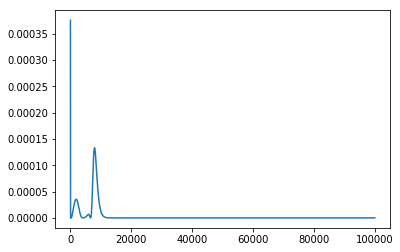

[[  9.32587341e-15]
 [  1.00000000e+00]
 [  1.00000000e+00]
 [  3.47499807e-14]]


In [7]:
x=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([[0,1,1,0]]).T

w1,w2=neural_network(x,y,[2])
